<a href="https://colab.research.google.com/github/MansiSharma98/YouTube-comments-Sentiment-Analysis/blob/main/GOT_comments_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading the CSV file we extracted

In [ ]:
import re
import pandas as pd
pd.set_option('display.max_colwidth', 300)

In [ ]:
df = pd.read_csv("/content/got_comments (2).csv")

In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(5)

,comment,comment_id,author_name,reply_count,like_count,date,total_reply_counts
0,Ur the most optimistic person in the universe and if you're piss Ed it means something,Ugylute2Ab6mA0G2cSF4AaABAg,HJRC_0823,1,0,2022-02-08T07:52:58Z,1
1,"It wasn't just the direction that plot moved, did you also note how the dialog stopped including poetic and thoughtful lines and how Varys and Tyrion's wit and intelligence dropped from magnficant to average dunderhead",UgyU8Y348xtxK5_LlGZ4AaABAg,Furry Lovebear,0,0,2022-01-25T22:23:47Z,0
2,Lazy writing towards the end.,UgxNEHssvL6RlJ9KQex4AaABAg,Charles Comeaux jr,0,0,2022-01-18T23:32:29Z,0
3,Cool,Ugy638KYY2rLNdovh2V4AaABAg,Beavis Johnson,0,0,2022-01-12T05:51:08Z,0
4,The night king vs people was the main plot point they just never wanted to address it. Was the first scene in the show and the last in every season,UgzJeAc28XQ3jCENR9B4AaABAg,Luke Coupland,0,0,2022-01-08T02:09:21Z,0


In [ ]:
df.shape

(100, 8)

# Basic features

In [ ]:
#checking how date looks like
df['date'][1]

'2022-01-25T22:23:47Z'

In [ ]:
#defining pattern to remove the latter part
pattern = re.compile(r'T[A-Z0-9:]+')

In [ ]:
#checking if the pattern works
res = pattern.findall(df['date'][1])
res

['T22:23:47Z']

In [ ]:
#function for removing pattern
def clean_date(x):
  a = re.sub(pattern, '',x)
  return  a.strip()

In [ ]:
df['date'] = df['date'].apply(lambda x: clean_date(x))
df.head(5)

,comment,comment_id,author_name,reply_count,like_count,date,total_reply_counts
0,Ur the most optimistic person in the universe and if you're piss Ed it means something,Ugylute2Ab6mA0G2cSF4AaABAg,HJRC_0823,1,0,2022-02-08,1
1,"It wasn't just the direction that plot moved, did you also note how the dialog stopped including poetic and thoughtful lines and how Varys and Tyrion's wit and intelligence dropped from magnficant to average dunderhead",UgyU8Y348xtxK5_LlGZ4AaABAg,Furry Lovebear,0,0,2022-01-25,0
2,Lazy writing towards the end.,UgxNEHssvL6RlJ9KQex4AaABAg,Charles Comeaux jr,0,0,2022-01-18,0
3,Cool,Ugy638KYY2rLNdovh2V4AaABAg,Beavis Johnson,0,0,2022-01-12,0
4,The night king vs people was the main plot point they just never wanted to address it. Was the first scene in the show and the last in every season,UgzJeAc28XQ3jCENR9B4AaABAg,Luke Coupland,0,0,2022-01-08,0


#Preprocessing the youtube comments

In [ ]:
import numpy as np
import nltk
import spacy
nlp=spacy.load('en_core_web_sm',disable=["tagger", "parser","ner"])
!pip install contractions
import contractions
!pip install emoji --upgrade
import emoji
import matplotlib.pyplot as plt
import warnings
#from emoji import UNICODE_EMOJI

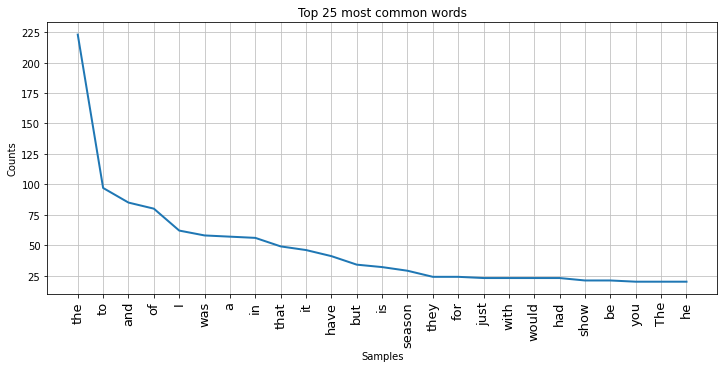

In [ ]:
all_words = []
for line in list(df['comment']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False) 

In [ ]:
nltk.download('wordnet')
lemmatizer = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))

#import nltk
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))

In [ ]:
doc=nlp(contractions.fix("How long did it take Chris to watch the show? I don’t think he said"))                                                           # creating doc object
tokens=[token.lemma_ for token in doc if(token.is_stop==False)] 
" ".join(tokens) 

'long Chris watch ? think say'

In [ ]:
contractions.fix("How long did it take Chris to watch the show? I don’t think he said") 

'How long did it take Chris to watch the show? I do not think he said'

In [ ]:
def cleaner(x):
  x = emoji.demojize(x)
  x = re.sub(r'http\S+', '', x)                                 #remove URLs
  x = re.sub(r'[!?"%$#@&_)(]', ' ', x)                         # remove special characters
  x = re.sub(r'[.,:;]', '', x)                                #remove punctuation marks
  x = re.sub(r'@[A-Za-z0-9]+', '',x)                            #removing mentions
  x  = x.lower()                                            #lowercase
  x = re.sub("'s\w","",x)                                   #removing 's
  #x = re.sub("[^a-z]+", " ", x)                               # fetch only words
  x = re.sub("[\s]+"," ",x)                                         # removing extra spaces
  x = contractions.fix(x)                                           #replacing contractions
  doc=nlp(x)                                                           # creating doc object
  tokens=[token.lemma_ for token in doc if(token.is_stop==False)]      # remove stopwords and lemmatize the text
  return " ".join(tokens)                                               #join tokens by space
  
  



  #tokens = [w for w in x.split() if not w in stop_words] #stopwords removal
  #newx = ''
  #for i in tokens:
    #newx = newx+lemmatizer.lemmatize(i)+' '
  #return newx.strip()

In [ ]:
df['clean_comment'] = df['comment'].apply(lambda x: cleaner(x))
df.head(100)

,comment,comment_id,author_name,reply_count,like_count,date,total_reply_counts,clean_comment
0,Ur the most optimistic person in the universe and if you're piss Ed it means something,Ugylute2Ab6mA0G2cSF4AaABAg,HJRC_0823,1,0,2022-02-08T07:52:58Z,1,ur optimistic person universe piss ed mean
1,"It wasn't just the direction that plot moved, did you also note how the dialog stopped including poetic and thoughtful lines and how Varys and Tyrion's wit and intelligence dropped from magnficant to average dunderhead",UgyU8Y348xtxK5_LlGZ4AaABAg,Furry Lovebear,0,0,2022-01-25T22:23:47Z,0,direction plot move note dialog stop include poetic thoughtful line varys tyrion wit intelligence drop magnficant average dunderhead
2,Lazy writing towards the end.,UgxNEHssvL6RlJ9KQex4AaABAg,Charles Comeaux jr,0,0,2022-01-18T23:32:29Z,0,lazy write end
3,Cool,Ugy638KYY2rLNdovh2V4AaABAg,Beavis Johnson,0,0,2022-01-12T05:51:08Z,0,cool
4,The night king vs people was the main plot point they just never wanted to address it. Was the first scene in the show and the last in every season,UgzJeAc28XQ3jCENR9B4AaABAg,Luke Coupland,0,0,2022-01-08T02:09:21Z,0,night king vs people main plot point want address scene season
...,...,...,...,...,...,...,...,...
95,How long did it take Chris to watch the show? I don’t think he said 😂,Ugwz9LYQreK7uDO3rQh4AaABAg,Earthling,0,0,2021-05-21T07:08:27Z,0,long chris watch think say face tear joy
96,"Damn... I hadn't even thought of the idea of Arya taking brans face and using that to kill the night king. That would have been really fucking cool, actually, and could have fixed that problem... Which was one of the major problems I had with season eight.",UgwTTZz5POaQUAl6R3Z4AaABAg,Justanother Lostsoul,0,0,2021-05-20T00:51:50Z,0,damn think idea arya take bran face kill night king fuck cool actually fix problem major problem season
97,16:30 lol. Agreed,Ugzp8TIK9x1OswGv3fZ4AaABAg,Fin707,0,0,2021-05-18T15:50:22Z,0,1630 lol agree
98,"Sorry, but if I would describe season 8 with one word it would be ""anticlimatic""",UgyEB6dtbxHLElMS6g94AaABAg,Mäxy,0,0,2021-05-18T15:25:55Z,0,sorry describe season 8 word anticlimatic


In [ ]:
df['clean_comment'][38] = 'call week short time period watch got? fucking clown take one week watch entire show'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['clean_comment'][38]

'call week short time period watch got? fucking clown take one week watch entire show'

In [ ]:
df.drop(df[ df['comment_id'] == 'Ugy_JN_8YgFxNqnq4-14AaABAg' ].index, inplace = True)

In [ ]:
df.shape

(99, 8)

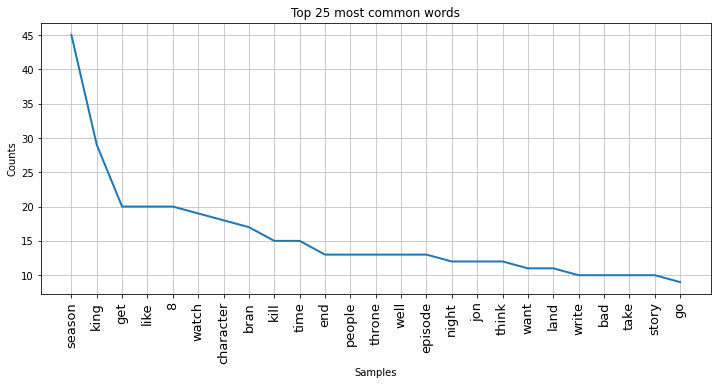

In [ ]:
all_words = []
for line in list(df['clean_comment']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# Linguistic Features

Bag of Words features
Here, frequency of every word in vocabulary is used to build the feature space.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizerCV = CountVectorizer()
featuresCV= vectorizer.fit_transform(df['clean_comment'])
featuresCV.shape

(99, 786)

In [ ]:
featuresCV

<99x786 sparse matrix of type '<class 'numpy.int64'>'
	with 1488 stored elements in Compressed Sparse Row format>

TF-IDF features
The main idea behinf tf-idf is to increase the importance of the words that occur in the subset of documents rather than the words occuring in all the documents
TF-IDF score of every word in vocabulary is calculated and used to build the feature space

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #feature extraction

In [ ]:
vectorizerTF = TfidfVectorizer() 
featuresTF = vectorizer.fit_transform(df['clean_comment'])
featuresTF.shape

(99, 788)

In [ ]:
featuresTF

<99x786 sparse matrix of type '<class 'numpy.float64'>'
	with 1488 stored elements in Compressed Sparse Row format>

In [ ]:
#vectorizer.get_feature_names() 

# Word Embeddings: Word2Vec

In [ ]:
# download and extract word2vec embeddings 
! wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
! gunzip GoogleNews-vectors-negative300.bin.gz

--2022-02-16 08:19:28--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.110.5
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.110.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  57.3MB/s    in 43s     

2022-02-16 08:20:12 (36.2 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
from gensim.models import KeyedVectors

# path of the downloaded model
filename = 'GoogleNews-vectors-negative300.bin'

# load into gensim
w2vec = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
# function to get vector representation of a tweet
def word_vector(tokens):
    vec = np.zeros((1,300))
    count = 0.
    for word in tokens:
        try:
            vec += w2vec.wv.word_vec(word)
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
# empty array of shape (no. of tweets X 300) to store word2vec features
wordvec_arrays = np.zeros((len(df),300))

for i,j in enumerate(df['clean_comment']):
  wordvec_arrays[i,:] = word_vector(j.split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


In [ ]:
wordvec_arrays.shape

(99, 300)

# Vader

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     |████████████████████████████████| 125 kB 5.3 MB/s 


In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df.comment[96]

"Damn... I hadn't even thought of the idea of Arya taking brans face and using that to kill the night king. That would have been really fucking cool, actually, and could have fixed that problem... Which was one of the major problems I had with season eight."

In [ ]:
analyzer.polarity_scores(df.comment[73])

{'compound': -0.2322, 'neg': 0.127, 'neu': 0.771, 'pos': 0.103}

In [ ]:
analyzer.polarity_scores(df.clean_comment[73])

{'compound': 0.0516, 'neg': 0.128, 'neu': 0.734, 'pos': 0.138}

as we can see above that cleaner comment definitely helped with identifying that it is a negative comment 

In [ ]:
df['vader_neg_sentiment']   = df['clean_comment'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['vader_pos_sentiment']   = df['clean_comment'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df['vader_comp_sentiment']  = df['clean_comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
df

,comment,comment_id,author_name,reply_count,like_count,date,total_reply_counts,clean_comment,vader_neg_sentiment,vader_pos_sentiment,vader_comp_sentiment
0,Ur the most optimistic person in the universe and if you're piss Ed it means something,Ugylute2Ab6mA0G2cSF4AaABAg,HJRC_0823,1,0,2022-02-08,1,ur optimistic person universe piss ed mean something,0.245,0.209,-0.1027
1,"It wasn't just the direction that plot moved, did you also note how the dialog stopped including poetic and thoughtful lines and how Varys and Tyrion's wit and intelligence dropped from magnficant to average dunderhead",UgyU8Y348xtxK5_LlGZ4AaABAg,Furry Lovebear,0,0,2022-01-25,0,direction plot moved also note dialog stopped including poetic thoughtful line varys tyrion's wit intelligence dropped magnficant average dunderhead,0.081,0.242,0.5859
2,Lazy writing towards the end.,UgxNEHssvL6RlJ9KQex4AaABAg,Charles Comeaux jr,0,0,2022-01-18,0,lazy writing towards end,0.455,0.000,-0.3612
3,Cool,Ugy638KYY2rLNdovh2V4AaABAg,Beavis Johnson,0,0,2022-01-12,0,cool,0.000,1.000,0.3182
4,The night king vs people was the main plot point they just never wanted to address it. Was the first scene in the show and the last in every season,UgzJeAc28XQ3jCENR9B4AaABAg,Luke Coupland,0,0,2022-01-08,0,night king v people main plot point never wanted address first scene show last every season,0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
95,How long did it take Chris to watch the show? I don’t think he said 😂,Ugwz9LYQreK7uDO3rQh4AaABAg,Earthling,0,0,2021-05-21,0,long take chris watch show? think said face tear joy,0.000,0.297,0.5859
96,"Damn... I hadn't even thought of the idea of Arya taking brans face and using that to kill the night king. That would have been really fucking cool, actually, and could have fixed that problem... Which was one of the major problems I had with season eight.",UgwTTZz5POaQUAl6R3Z4AaABAg,Justanother Lostsoul,0,0,2021-05-20,0,damn even thought idea arya taking bran face using kill night king would really fucking cool actually could fixed problem one major problem season eight,0.364,0.080,-0.8813
97,16:30 lol. Agreed,Ugzp8TIK9x1OswGv3fZ4AaABAg,Fin707,0,0,2021-05-18,0,1630 lol agreed,0.000,0.831,0.5994
98,"Sorry, but if I would describe season 8 with one word it would be ""anticlimatic""",UgyEB6dtbxHLElMS6g94AaABAg,Mäxy,0,0,2021-05-18,0,"sorry would describe season 8 one word would ""anticlimatic""",0.140,0.000,-0.0772


# Text Blob

In [ ]:
from textblob import TextBlob

In [ ]:
df.comment[0]

"Ur the most optimistic person in the universe and if you're piss Ed it means something"

In [ ]:
TextBlob(df.comment[0]).correct()

TextBlob("Or the most optimistic person in the universe and if you're pass D it means something")

In [ ]:
TextBlob(df.comment[0]).sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

In [ ]:
TextBlob(df.comment[0]).correct().sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

let us avoid the spelling correction for now as most comments have correct spellings already

In [ ]:
df['textblob_polarity'] = df['comment'].map(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df.head(5)

,comment,comment_id,author_name,reply_count,like_count,date,total_reply_counts,clean_comment,vader_neg_sentiment,vader_pos_sentiment,vader_comp_sentiment,textblob_polarity
0,Ur the most optimistic person in the universe and if you're piss Ed it means something,Ugylute2Ab6mA0G2cSF4AaABAg,HJRC_0823,1,0,2022-02-08,1,ur optimistic person universe piss ed mean something,0.245,0.209,-0.1027,0.500000
1,"It wasn't just the direction that plot moved, did you also note how the dialog stopped including poetic and thoughtful lines and how Varys and Tyrion's wit and intelligence dropped from magnficant to average dunderhead",UgyU8Y348xtxK5_LlGZ4AaABAg,Furry Lovebear,0,0,2022-01-25,0,direction plot moved also note dialog stopped including poetic thoughtful line varys tyrion's wit intelligence dropped magnficant average dunderhead,0.081,0.242,0.5859,0.208333
2,Lazy writing towards the end.,UgxNEHssvL6RlJ9KQex4AaABAg,Charles Comeaux jr,0,0,2022-01-18,0,lazy writing towards end,0.455,0.000,-0.3612,-0.250000
3,Cool,Ugy638KYY2rLNdovh2V4AaABAg,Beavis Johnson,0,0,2022-01-12,0,cool,0.000,1.000,0.3182,0.350000
4,The night king vs people was the main plot point they just never wanted to address it. Was the first scene in the show and the last in every season,UgzJeAc28XQ3jCENR9B4AaABAg,Luke Coupland,0,0,2022-01-08,0,night king v people main plot point never wanted address first scene show last every season,0.000,0.000,0.0000,0.138889


In [ ]:
# most positive comments
df.sort_values(by=['textblob_polarity'], ascending=False)[['comment', 'textblob_polarity']].head(10)

,comment,textblob_polarity
62,Tyrion is the best character and has a lot of layers,1.0
97,16:30 lol. Agreed,0.8
21,I wonder if Chris ever noticed or laughed at the Starbucks cup and bottles of water in the show so yeah Starbucks existed in Westeros.,0.7
80,how can Jaqen Hghar not be your favorite character?,0.5
36,"Jon got better, he is gonna colonize beyond the wall and be the king there",0.5
68,It made too many set up through out the show that it can't handle all the pay off in just one season. They shouldn't end in just 8 seasons.,0.5
78,The sea manatees from the South Park episode parodying Family guy could have put together a better finale.,0.5
0,Ur the most optimistic person in the universe and if you're piss Ed it means something,0.5
23,Such a great video in retrospect!,0.5
93,I think if they give us some more info about choices that they are making with more episodes it would have made sense.,0.5


row 78: "The sea manatees from the South Park episode parodying Family guy could have put together a better finale." does not look to me like a positive comment

In [ ]:
# most negative comments
df.sort_values(by=['textblob_polarity'], ascending=True)[['comment', 'textblob_polarity']].head(10)

,comment,textblob_polarity
98,"Sorry, but if I would describe season 8 with one word it would be ""anticlimatic""",-0.500000
71,The White Walkers were stupidly overpowered,-0.400000
67,The whole Jaime not giving a shit about the people of Kings Landing thing was just the worst. Dude murdered the Mad King because he wanted to burn the city. They had to ignore a LOT of stuff to get to the places they went. It needed at least another season to tell the story it told.,-0.385000
86,This dudes an idiot. Battle of the bastards was one of my least favourite episodes. Full of plot armour and stupid illogical decisions that didn't happen in earlier seasons. Casual,-0.341667
39,I think the biggest let down for me was the conclusion of the white walkers… so disappointing,-0.251852
2,Lazy writing towards the end.,-0.250000
54,All through the pandemic I didn’t watch a single episode of game of thrones. It is not a rewatchable show,-0.235714
65,bran was named after a bran flake. plain and flavourless,-0.214286
25,i would rather see joffrey rise from the dead marry sansa and sit in the iron trone than see that biiitch boy bran sit on that throne,-0.200000
18,GoT is dead to me.,-0.200000


# Exploration

In [ ]:
df.sort_values(by=['like_count'], ascending=False)[['comment']].head(10)

,comment
42,The writers also canceled their panel interview from fans after all the backlash. They were too scared to face the fans.
76,My heart hurts every time I hear about this show. I've seriously only watched 3-6 ONE TIME. Season 8 ep 2 is easily the last episode that felt like GOT. Spent 8 years on this show smh breaking bad would've never done this to me
23,Such a great video in retrospect!
84,"Like it or not, Bran was the only character who had ""no skin in the game [of thrones]"". Yes, he had been mamed by Jamie, but as he kept saying truthfully, he was no longer that person. Bran was -- like it or not - the only character who would have no old grudges to settle or any old enemies seek..."
35,All the suspense Which was made in previous seasons means nothing in season 8
41,100% agree with you on Bran. Cannot stand that charactor and brought nothing to the series
74,"They beat the White Walkers before Cersei. Therefore, the throne was more important, than the Army of the Dead."
58,"18:15—😂caught me off guard, inconsolably laughing right now!!"
73,"Man I know this review came out two years ago but what about those children of the forest folks, their character design became so lame from one season to the next haha"
71,The White Walkers were stupidly overpowered


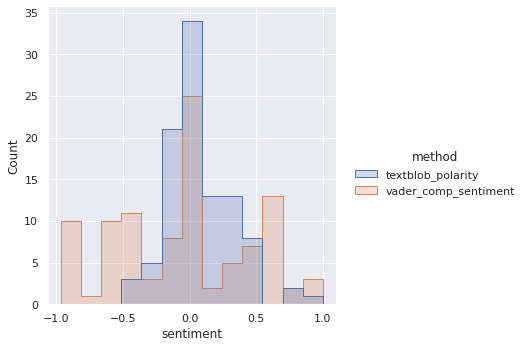

In [ ]:
# comparison of textblob and vader sentiment distribution
sub = df[['comment', 'textblob_polarity', 'vader_comp_sentiment', 'date']]
pol_hist = sub.melt(id_vars=['comment', 'date'], value_vars=['textblob_polarity', 'vader_comp_sentiment'], var_name='method', value_name='sentiment')
sns.displot(pol_hist, x="sentiment",hue="method", element="step")

Textblob has more comments on the less negative & positive side which is not accurate since most of the comments are negative

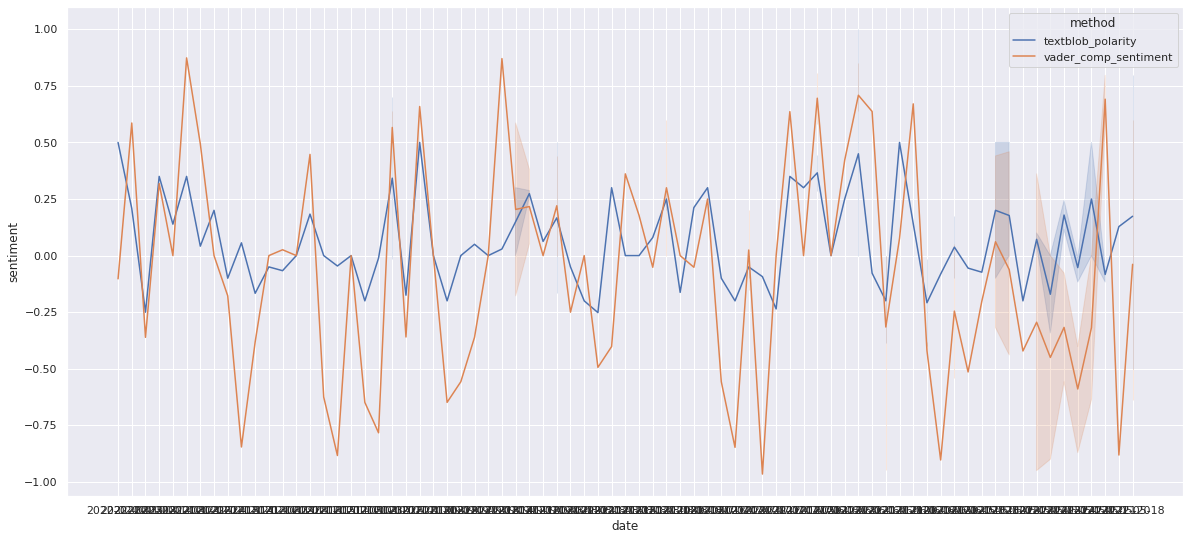

In [ ]:
# sentiments over time 
sns.set(rc={'figure.figsize':(20,9)})
sns.lineplot(x="date", y="sentiment", hue="method", data=pol_hist) 
